# Skew-T - ln P plot

Demonstrate how to construct dry adiabats and isotherms for
a thermodynamic diagram using the functions in
[makeSkew.py](https://github.com/phaustin/A405/blob/master/a405skewT/makeSkew.py)

In [21]:
import numpy as np
import pandas as pd
import h5py
from pprint import pformat
import matplotlib.pyplot as plt

### Skewed temperature coordinates

If you try plotting your soundings on the conventional plot above, you'll see
that the height-temperature dependence makes it difficult to see the temperature
and dewpoint together.  The traditional approach is to slant the temperature
line by a constant slope (note that this is different from rotating the line,
because the y axis doesn't change)

In [22]:
def convertSkewToTemp(xcoord, press, skew):
    """
    convertSkewToTemp(xcoord, press, skew)
    Determines temperature from knowledge of a plotting coordinate
    system and corresponding plot skew.
    Parameters
    - - - - - -
    xcoord : int
        X coordinate in temperature plotting coordinates.
    press : float
        Pressure (hPa).
    skew : int
        Skew of a given coordinate system.
    Returns
    - - - -
    Temp : float
        Converted temperature in degC.
    Examples
    - - - - -
    >>> convertSkewToTemp(300, 8.e4, 30)
    638.6934574096806
    """
    Temp = xcoord  + skew * np.log(press);
    return Temp

def convertTempToSkew(Temp, press, skew):
    """
    convertTempToSkew(Temp, press, skew)
    Determines the transformed temperature in plotting coordinates.
    Parameters
    - - - - - -
    Temp : float
        Temperature (degC)
    press : float
        Pressure (hPa).
    skew : int
        Designated skew factor of temperature.
    Returns
    - - - -
    tempOut : float
        Converted temperature (degC).
    Examples
    - - - - -
    >>> convertTempToSkew(30., 8.e4, 30)
    -308.69345740968055
    """
    tempOut = Temp - skew * np.log(press);
    return tempOut

### For Wednesday 9am

Check in a notebook that puts your sounding on the tephigram and draws a line of constant saturation mixing ratio 
$r_s$ = 10 g/kg between 1000 and  400 hPa.  

Hint -- you want to rootfind the temperature that satisfies $r_s = \frac{e_s(T)}{p - e_s(T)} * \epsilon = 0.01\ g/kg, \ where \ \epsilon = 0.622$, 
for a range of pressures then convert the temperatures to skew coordinates.

======================================================================================================================

### Hadleigh's Solution:

(Cambridge bay soundings from 2015. Note: the cold temperature regime)

======================================================================================================================

reading file: hilo.h5

empty key:  TITLE
empty key:  CLASS
empty key:  VERSION
empty key:  PYTABLES_FORMAT_VERSION


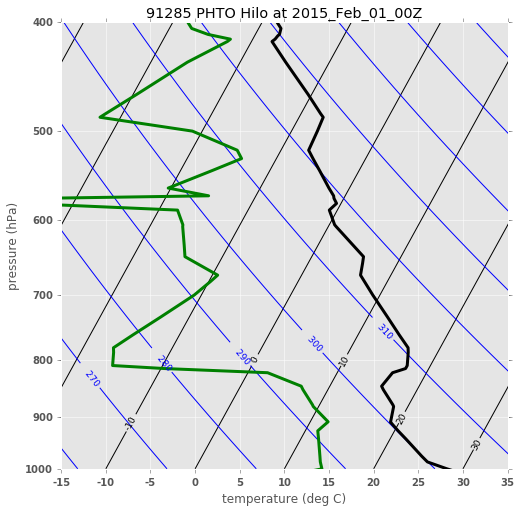

In [23]:
from a405skewT.makeSkew import makeSkewDry
import a405skewT.makeSkew
from importlib import reload
reload(a405skewT.makeSkew)

#%config InlineBackend.close_figures=False
fig,ax =plt.subplots(1,1,figsize=(8,8))
ax,skew = makeSkewDry(ax)

filename='hilo.h5';
print('reading file: %s\n' %filename)

attributes={}
with h5py.File(filename,'r') as f:
    keys=f.attrs.keys()
    for key in keys:
        try:
            attributes[key]=f.attrs[key]
        except IOError:
            print('empty key: ',key)

separator= '\n' + '+'*30 + '\n'
sounding_dict={}
with pd.HDFStore(filename,'r') as store:
    times=store.keys()
    for the_time in times:
        sounding_dict[the_time]=store[the_time]
sounding=sounding_dict[times[3]]
title_string=attributes['header']
index=title_string.find(' Observations at')
location=title_string[:index]
title='{} at {}'.format(location,times[0][2:])
units=attributes['units'].split(';')
units_dict={}
for count,var in enumerate(sounding.columns):
    units_dict[var]=units[count]

triplets=zip(sounding['temp'],sounding['dwpt'],sounding['pres'])
xcoord_T=[]
xcoord_Td=[]
for a_temp,a_dew,a_pres in triplets:
    xcoord_T.append(convertTempToSkew(a_temp,a_pres,skew))
    xcoord_Td.append(convertTempToSkew(a_dew,a_pres,skew))
ax.plot(xcoord_T,sounding['pres'],color='k',label='temp')
ax.plot(xcoord_Td,sounding['pres'],color='g',label='dew')

[line.set(linewidth=3) for line in ax.lines[-2:]]
ax.set(title=title)
ax.set(ylim=[1000,400])
fig.canvas.draw()


#### Then take the above plot and add a saturation vapout pressure isohume...